In [1]:
# imports
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt
    
import numpy.random as random
import scipy.stats as stats


Set up two sets of 18 values from normal distributions, either $N$(0,1) or $N$(1,1):

In [2]:
ndata=18
data1=random.randn(ndata)
data2=random.randn(ndata)+1.

#del A #  del A if we reinitialize, be sure to redo the slow calculation when we get there.

__Using the below code box, plot histograms of data1 and data2 with the same binning enforced (don't allow automatic binning); can you see the difference in means by eye?__

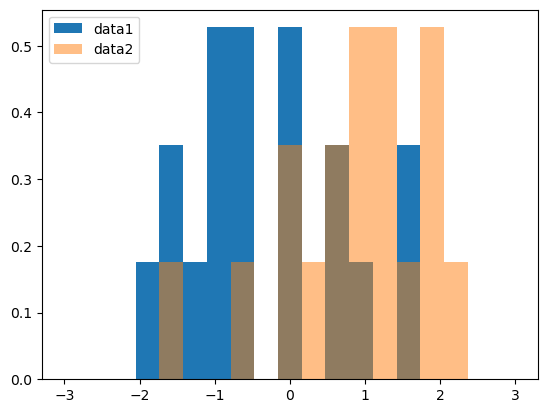

In [3]:
plt.hist(data1,bins=np.linspace(-3,3,20), density=True,label='data1')
plt.hist(data2,bins=np.linspace(-3,3,20), alpha=0.5,label='data2',density=True)
plt.legend()

Now, let's calculate confidence intervals for the mean of each sample.  __Add code to calculate the std. deviation of the mean for each sample, `sigma1` and `sigma2`.__ (Reminder: _sample_ std. deviation is `np.std` with `ddof=1`).

In [4]:
mean1=np.mean(data1)
mean2=np.mean(data2)

sigma1=np.std(data1)/np.sqrt(ndata)  # want the standard deviation of the mean of data1
sigma2=np.std(data2)/np.sqrt(ndata)  # want the standard deviation of the mean of data2

print(f'means: {mean1:.4f}, {mean2:.4f}')
print(f'sigmas {sigma1:.4f} {sigma2:.4f}')

tfactor=stats.t.ppf(1-0.025,ndata-1)
print('Confidence Interval 1: ',mean1-tfactor*sigma1,mean1+tfactor*sigma1)
print('Confidence Interval 2: ',mean2-tfactor*sigma2,mean2+tfactor*sigma2)


means: -0.3080, 0.8618
sigmas 0.2357 0.2222
Confidence Interval 1:  -0.8052376338261156 0.18928568032350762
Confidence Interval 2:  0.3930207524762646 1.3306551293765627


__Now, determine a confidence interval for the difference between the two means, applying propagation of errors.__  `sigma_diff` below should be the uncertainty in the difference between the means.  

Note that the tfactor is not the same as the previous case.  In comparing two samples of size $n_1$ and $n_2$, it turns out that the t statistic for the difference will be distributed as a t distribution with ($n_1$+$n_2$-2) degrees of freedom


__Discuss: Does the confidence interval you derive include 0?__  

__We can also estimate a 95% lower limit on $\mu_2 - \mu_1$ (= (mean difference) - tfactor * (std. dev. of mean difference), but setting the tfactor for a 1-sided limit.__

In [6]:
# difference between the means, where we are testing if mu_2 > mu_1.
mean_diff=mean2-mean1

# uncertainty in the difference between the means, determined via propagation of errors
sigma_diff=np.sqrt(np.square(sigma2) + np.square(sigma1))

# t value cutoff for a 2-sided confidence interval
tfactor=stats.t.ppf(1-0.025, 2*ndata-2)
print('2-sided Confidence Interval: ', mean_diff-tfactor*sigma_diff, mean_diff+tfactor*sigma_diff)

# t value cutoff for a 1-sided confidence interval, i.e. assuming that mu_2 > mu_1
tfactor=stats.t.ppf(1-0.05, 2*ndata-2)

# note that the lower limit should be only one number, not 2
print('1-sided Confidence Interval / Lower Limit: ',mean_diff-tfactor*sigma_diff)

2-sided Confidence Interval:  0.5115240010775606 1.8281038342778746
1-sided Confidence Interval / Lower Limit:  0.6220853437681528


# Time to take a break!

We'll stop here for now so we can discuss more things.  If you have extra time:

- Try making different realizations of your datasets by rerunning all the cells above and see how the confidence intervals change, how often they include 0, etc.

- make `ndata` larger or smaller and see how your confidence intervals and ability to reject the null hypothesis of zero difference changes.


## Calculating the Bayesian probability that $\mu_2 > \mu_1$

First, we calculate the array $A = {1\over 2}(\Sigma (x_{i} - u)^2 +\Sigma (y_{i}- (u+v))^2)$:

In [7]:
# Only set up the A array if we haven't calculated it before -- this can be slow.

try:
    A
except NameError:    
# set up grid in u and v: nbin values from -5 to +5
    nbin=501
    u = np.linspace(-5.,5.,nbin)
    v = np.copy(u)
    A=np.zeros((nbin,nbin))
    
    # calculate A on grid.  i = index in u array; j = index in v array.
    for i in np.arange(nbin):
        for j in np.arange(nbin):
            A[j,i]=(np.sum((data1-u[i])**2)+np.sum((data2-u[i]-v[j])**2))/2.

Then, we calculate $p(u,v) = 2\, \Gamma(n)\, A^{-n}$.



# Using Bokeh

We will interactively display an image of $p(u,v)$ using the Bokeh toolkit. For the Bokeh website, see https://bokeh.org/ .  Tutorials are available from the tutorial link at the top of that page.

Bokeh allows you to make interactive displays of plots (e.g., with the ability to zoom in or out) in 2 or 3D, images, etc.  This can be very useful for exploring your data!

__Change the 0 to a 1 in `if 0` below to get the Bokeh display to show. Then explore the array p(u,v).  Identify where it peaks, and estimate the corresponding values of u and v.__

In [8]:
# calculate probability p(u,v) from A

from scipy.special import gamma
prob_uv=2*gamma(ndata)*A**(-ndata)  

# Explore p(u,v).  u is the x axis here, v is the y axis.

# Do imports for bokeh
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models.mappers import LinearColorMapper,LogColorMapper,EqHistColorMapper
from jupyter_bokeh.widgets import BokehModel
from IPython.display import display

if 1:
# Bokeh command telling it to put the plot in this notebook
    output_notebook()

# Set up tooltips from Bokeh so we can read off values wherever we point the cursor
    p = figure(tooltips=[("u", "$x"), ("v", "$y"), ("value", "@image")])
    p.x_range.range_padding = p.y_range.range_padding = 0

# Choose logarithmic color scaling; you could instead try the linear or EqHist color mappers
    color_mapper = LogColorMapper(palette="Turbo256", low=prob_uv.min(), high=prob_uv.max())

# Set up the image display, with axis ranges from -5 to +5 
# dw and dh set the plot size within the notebook
    p.image(image=[prob_uv], x=-5, y=-5, dw=10, dh=10, level="image",
            color_mapper=color_mapper)

# show the image, interactively
    handle = display(BokehModel(p))

Loading BokehJS ...

BokehModel(render_bundle={'docs_json': {'ae74a170-990d-4852-9d66-6908509c590c': {'version': '3.7.0', 'title': …

# Not using Bokeh

For me Bokeh is running but not showing up in the notebook within vscode.  If you load the notebook in Jupyter it should work, but regardless we can use matplotlib to show an image...

In [9]:
# list color maps available in matplotlib
from matplotlib import colormaps
list(colormaps)


['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

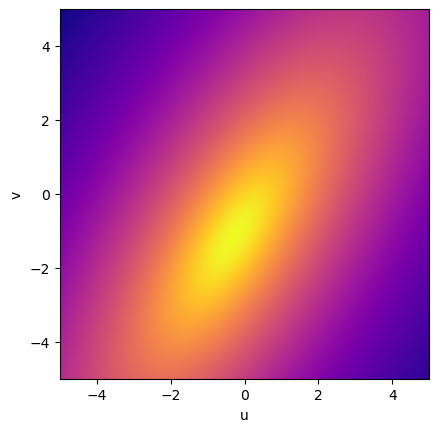

In [10]:
# display an image of prob_uv, with the plasma color map

if 1:
    plt.imshow(np.log(prob_uv),cmap='plasma',extent=(-5,5,-5,5))
    plt.xlabel('u')
    plt.ylabel('v')

We can marginalize to get $p(v) = \int p(u,v) du$ and $p(u) = \int p(u,v) dv$.  We can approximate the integrals by sums, but note that _if you do that you have to normalize them!_.

In [11]:
# Calculate marginalized probabilities: p(u) and p(v).  
# Note our array is given as p[v,u]; so summing over axis 0 sums over v!!!
# we make sure both curves have the same integral by dividing by the overall sum.
# We really should multiply by dx so they integrate to 1, but that doesn't matter for anything we do.

prob_u=np.sum(prob_uv,axis=0)
prob_u=prob_u/np.sum(prob_u)

prob_v=np.sum(prob_uv,axis=1)
prob_v=prob_v/np.sum(prob_v)


## We can make ordinary plots in Bokeh too! 

Let's plot $p(u)$ and $p(v)$.  Bokeh lets us do that interactively too!

**Evaluate by eye and discuss with your group:**

- **Are the Bayesian results peaked where you expect?  Note that $\mu_1 = 0$ corresponds to $u=0$, $\mu_2 - \mu_1 = 1$ corresponds to $v=1$.**

- **Are the Bayesian results consistent with the true values (i.e., is the probability nonnegligible at those values of $u$ and $v$?)**

In [12]:
if 1:

# Set up tooltips from Bokeh so we can read off values wherever we point the cursor,
#   if we point close enough to the curve.  Set plot width/height.
    p = figure(width=400,height=200,tooltips=[("v", "$x"), ("p(v)", "$y")])
    p.x_range.range_padding = 0
    p.y_range.range_padding = 0.1

# Plot the figure.
    p.line(v,prob_v,line_width=2,legend_label='p(v)',color='blue',alpha=0.5)
    p.line(u,prob_u,line_width=1.5,legend_label='p(u)',color='red',line_dash='dashed')

# Show the plot, interactively
    show(p)


## Matplotlib equivalent

If bokeh isn't working for you hopefully this will...

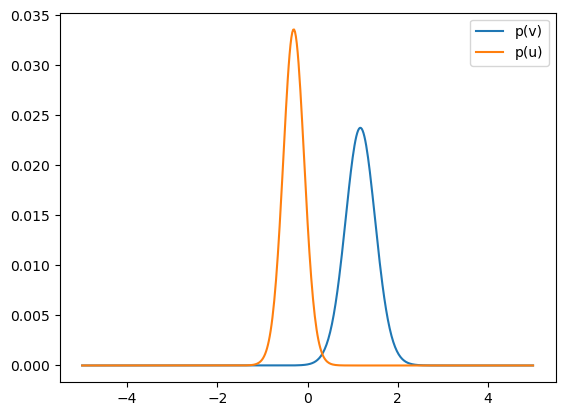

In [13]:
if 1:
    plt.plot(v,prob_v,label='p(v)')
    plt.plot(u,prob_u,label='p(u)')
    plt.legend()

Now, we can calculate the Bayesian posterior probability that $v>=0$ and the corresponding odds.

In [14]:
## calculate posterior probability and odds that v>0

wh_gt=np.where(v >= 0)
p_gt_0=np.sum(prob_v[wh_gt])

wh_lt=np.where(v <= 0)
p_lt_0=np.sum(prob_v[wh_lt])

# this is a cheat to handle the fact that we included the value at 0 in both sums:
p_gt_0 = p_gt_0/(p_gt_0+p_lt_0)

# probability that p>0, as well as odds in favor of that 
print(p_gt_0,p_gt_0/(1-p_gt_0))

0.9993023998488171 1432.4859278689962


__Compare the results to the frequentist confidence interval: change the value of `signif` in the code box below until your confidence interval barely excludes 0 to see what significance v<0 is excluded at.__

In [15]:
signif=0.05
tfactor=stats.t.ppf(1-signif/2, 2*ndata-2)
sigma_diff=np.sqrt(sigma1**2+sigma2**2)

print('2-sided Confidence Interval: ',
      (mean2-mean1)-tfactor*sigma_diff,(mean2-mean1)+tfactor*sigma_diff)

tfactor=stats.t.ppf(1-signif, 2*ndata-2)
print('1-sided Confidence Interval/Lower Limit : ',(mean2-mean1)-tfactor*sigma_diff)


2-sided Confidence Interval:  0.5115240010775606 1.8281038342778746
1-sided Confidence Interval/Lower Limit :  0.6220853437681528


# The likelihood ratio test

A frequentist method with greater statistical power is to evaluate the ratio of the maximum likelihood under $H_0$ and $H_1$, $\Lambda$.  $-2\ln{\Lambda}$ should be distributed as a $\chi^2$ random variable.

In [16]:
wh_0=np.where(v == 0)
wh_gt=np.where(v > 0)
likelihood_ratio=np.max(prob_uv[wh_0,:])/np.max(prob_uv[wh_gt,:])

# how to do it with f-string formatting:
print(f'-2 ln of ratio: {-2*np.log(likelihood_ratio):.2f}')

# how to print that out using the older string.format() formatting instead:
# print('-2 ln of ratio: {:.2f}'.format(-2*np.log(likelihood_ratio)))


print(f'minimum chi-squared value for significant result with alpha = 0.05 :'
       + f'{stats.chi2.ppf(1-0.05,1):.2f}')
print(f'p-value: {1-stats.chi2.cdf(-2*np.log(likelihood_ratio),1):.2e}')

-2 ln of ratio: 11.13
minimum chi-squared value for significant result with alpha = 0.05 :3.84
p-value: 8.50e-04


# The t test

The classical statistical test for checking if two datasets have the same mean is the $t$ test, which uses a statistic similar to the $t$ we've encountered before.  We calculate the $t$ statistic for the difference of the means of the two datasets; it should follow a $t$ distribution.

In [17]:
# the hard way, that allows for datasets of different sizes:
# ndata1=ndata2=ndata
# s=sqrt (((ndata1-1)*sigma1**2 + (ndata2-1)*sigma2**2)*
#                         (1/(ndata1+ndata2-2.))*(1/ndata1+1/ndata2))

mean1=np.mean(data1)
mean2=np.mean(data2)
# the easy way, since nx=ny:
sigma1=np.std(data1,ddof=1)/np.sqrt(ndata)
sigma2=np.std(data2,ddof=1)/np.sqrt(ndata)

s=np.sqrt(sigma1**2+sigma2**2)

# calculate t statistic
t=(mean2-mean1)/s   

print(f'Value of t: {t:.2f}')

Value of t: 3.51


In [18]:
data1.shape

(18,)

## Calculating cutoffs and p values

For a two-sided test, we divide our rejection region between the two tails of the distribution.  We can again use `stats.t.ppf()` to determine cutoffs in +/-t corresponding to our threshold for signficance.

In [19]:
signif=0.05
print(stats.t.ppf(1-signif/2, 2*ndata-2))

2.032244509317718


__Using the below code box, calculate the cutoff in t for a one-tailed test, where we are checking if mean2 is > mean1, without considering a lower value a possibility.__  This is more analogous to our Bayesian test.

In [20]:
signif=0.05
print(stats.t.ppf(1-signif, 2*ndata-2))

1.6909242551868546


### Calculating p-values

We can calculate a p-value for our value of t using `stats.t.cdf()`.  Note that we want the probability of getting the observed value of t _or greater_; the CDF integrates from -infinity to x.  

__Using the below code box, calculate the p-value for our value of t for a one-sided test.__

In [21]:
stats.t.cdf?

Signature: stats.t.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      ~/miniforge3/envs/Stats_Python/lib/python3.13/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method

In [22]:
print(1-stats.t.cdf(t,2*ndata-2))

0.0006431553284441671


We can save all this work by using `stats.ttest_ind`.  It will only do a two-tailed test, though it can relax the assumption of equal sigmas.

In [23]:
# These two values turn out to be the same if data2 & data1 have the same size, 
#         but in general that doesn't need to be the case.
# stats.ttest_ind returns a tuple of the t statistic and the p-value.

print(stats.ttest_ind(data2,data1))

print(stats.ttest_ind(data2,data1,equal_var = False))

TtestResult(statistic=np.float64(3.5096495119426243), pvalue=np.float64(0.0012863106568882531), df=np.float64(34.0))
TtestResult(statistic=np.float64(3.5096495119426243), pvalue=np.float64(0.0012901577552770782), df=np.float64(33.882711347578216))


# If you have extra time...

- Try making different realizations of your datasets by rerunning all the cells above and see how the confidence intervals change, how often they include 0, etc.

- make `ndata` larger or smaller and see how your confidence intervals and ability to reject the null hypothesis of zero difference changes.

- Play with different color maps and color mappers for the display of prob_uv

- Explore Bokeh capabilities based on the tutorials and add features you like to the plots made here.
